In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score



In [2]:
# Load dataset

data = pd.read_csv("/Users/nishitpopat/Documents/Sem 3 /Sujoy Poul/Mall_Customers.csv")

In [3]:
# Basic exploration
print(data.head())
print(data.describe())
print(data.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

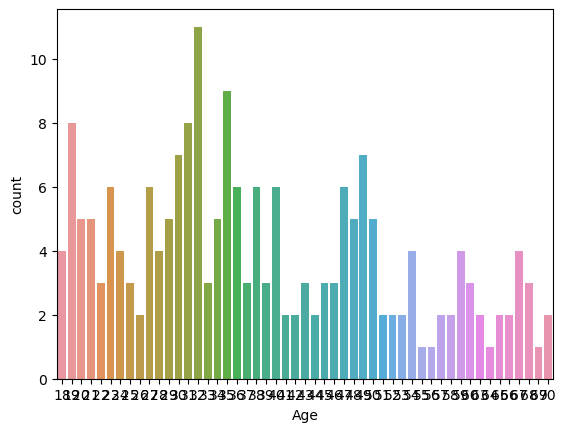

/var/folders/ks/z_7xfdj16xj_s7g87xck6cwr0000gn/T/ipykernel_33891/2961607270.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


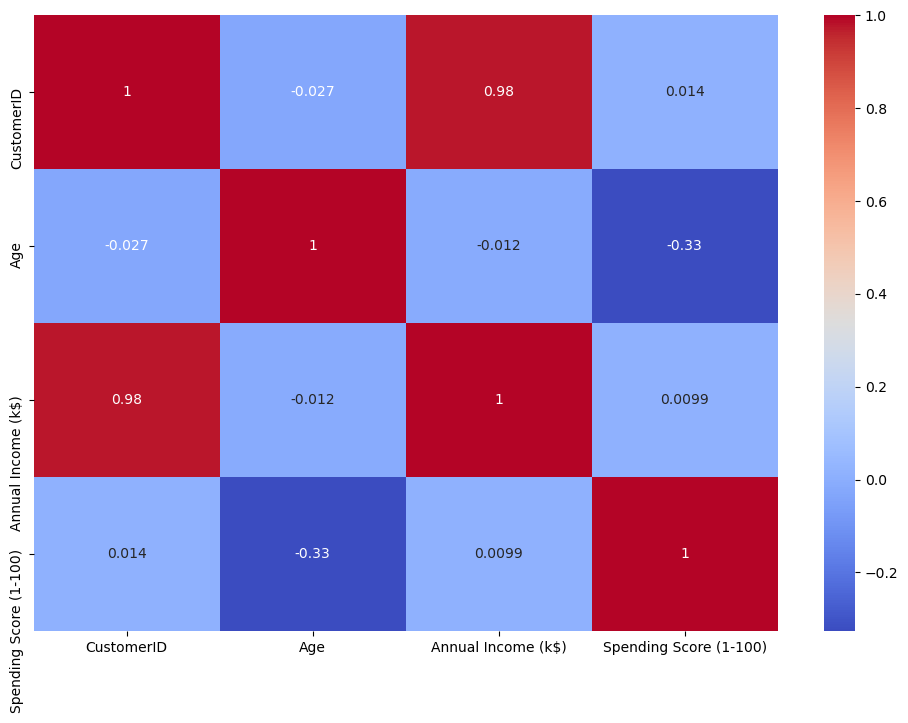

In [11]:
# Example of visualization: Distribution of target variable
sns.countplot(x="Age", data=data)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
# Encoding the 'Genre' column
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])


In [16]:
# Defining the feature and target variable
X = data[['Age']]  # Feature variable
y = data['Genre_encoded']  # Target variable

In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

In [19]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_clf_predictions = rf_clf.predict(X_test)

In [22]:
# Evaluating the models
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_predictions)


In [25]:
log_reg_report = classification_report(y_test, log_reg_predictions)
rf_clf_report = classification_report(y_test, rf_clf_predictions)

(log_reg_accuracy, rf_clf_accuracy, log_reg_report, rf_clf_report)

(0.6166666666666667,
 0.5666666666666667,
 '              precision    recall  f1-score   support\n\n           0       0.61      0.97      0.75        36\n           1       0.67      0.08      0.15        24\n\n    accuracy                           0.62        60\n   macro avg       0.64      0.53      0.45        60\nweighted avg       0.64      0.62      0.51        60\n',
 '              precision    recall  f1-score   support\n\n           0       0.62      0.72      0.67        36\n           1       0.44      0.33      0.38        24\n\n    accuracy                           0.57        60\n   macro avg       0.53      0.53      0.52        60\nweighted avg       0.55      0.57      0.55        60\n')